**Relevant reading for this problem set**:
<a href="https://moderndive.com/10-inference-for-regression.html"
target="_blank">ModernDive Chapter 10: Inference for Regression</a>.

## Background

For this problem set you will apply statistical inference to a linear
modeling and explore methods to check the required conditions. To start
we will build a model using data from the `palmerpenguins` package. The
`penguins` data contains size measurements for three penguin species
observed on three islands in the Palmer Archipelago, Antarctica.

First we will start with our typical exploratory data analysis and then
build our linear model. From there we will use our new skills to make
inferences about our regression model and check the necessary
conditions.

### Load packages

We will read the data in from the`palmerpenguins` package, explore the
data using the `dplyr` package and visualize it using the `ggplot2`
package. The `moderndive` package includes some nice functions to show
regression model outputs and finally use the `infer` package for “tidy”
and transparent statistical inference.

In [5]:
library('moderndive')
library('infer')
library('palmerpenguins')
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ modeldata    1.3.0      ✔ tune         1.2.1 
✔ parsnip      1.2.1      ✔ workflows    1.1.4 
✔ purrr        1.0.2      ✔ workflowsets 1.1.0 
✔ recipes      1.0.10     ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



### The data

In [6]:
pen = penguins |> 
  filter(!is.na(flipper_length_mm))

Take a moment to look at the data using `glimpse` and `head`. The dataset contains 8
variables. You can read more about the variables by placing your cursor in `penguins` and 
looking at the `Contextual Help` tool.

For our lab we will focus on four variables, the explanatory variables
include:

-   `flipper_length_mm` - an integer denoting flipper length
    (millimeters)
-   `bill_length_mm` - a number denoting bill length (millimeters)
-   `species`- denotes penguin species (Adélie, Chinstrap and Gentoo)

The outcome variable `body_mass_g` is an integer denoting body mass
(grams).

### Visualization

We will start by investigating the relationship between
‘flipper_length_mm’ and ‘body_mass_g’.

`geom_smooth()` using formula = 'y ~ x'


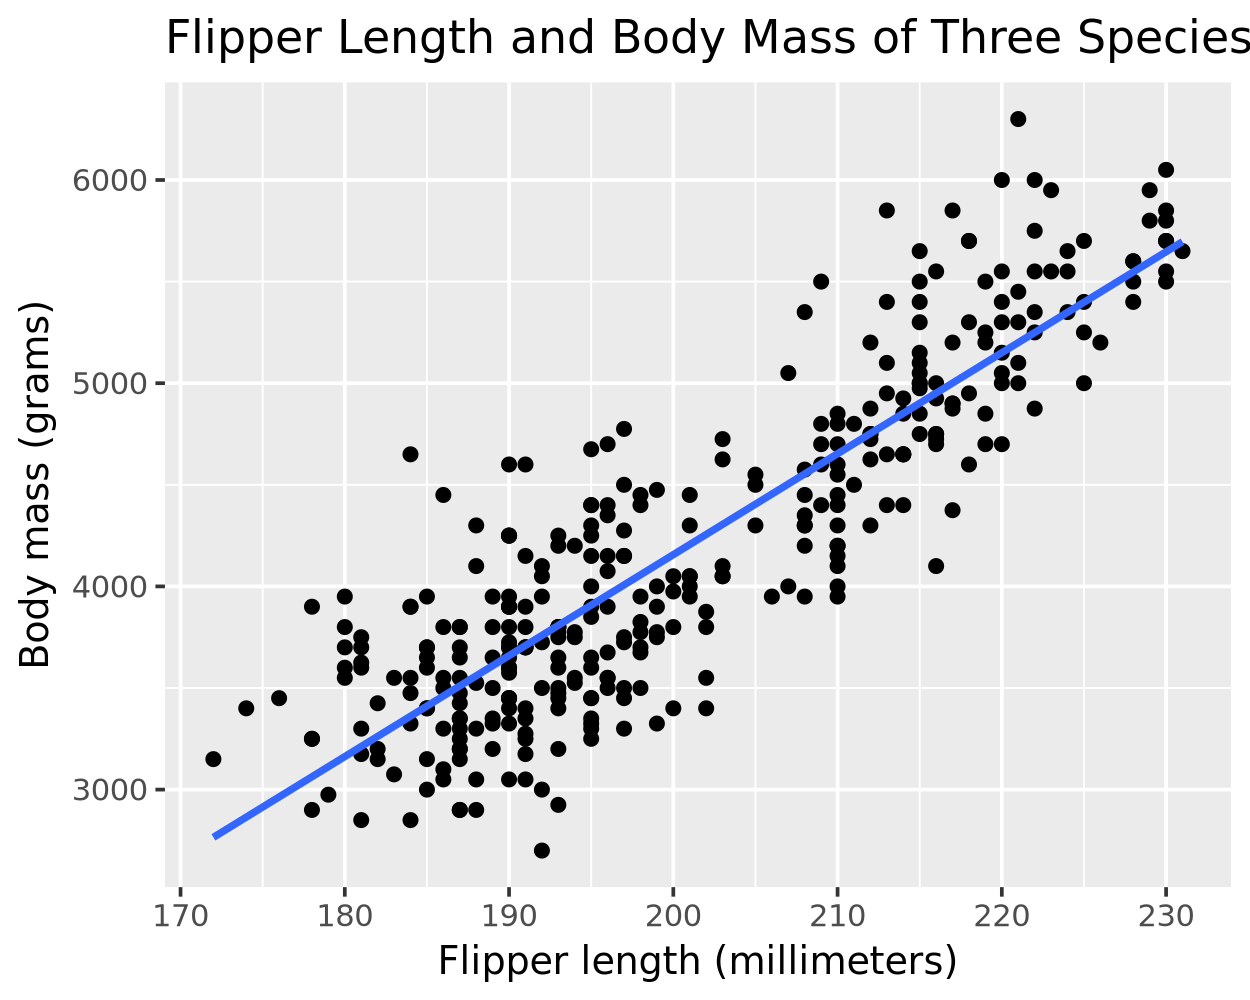

In [7]:
ggplot(data = pen, aes(y = body_mass_g, x = flipper_length_mm)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Flipper length (millimeters)", 
       y = "Body mass (grams)", 
       title = "Flipper Length and Body Mass of Three Species of Penguins") 

## Question 1

Does the relationship appear to be positive or negative? Does it look to
be reasonably linear?

**Answer:**
The relationship between flipper length and body mass appears to be positive. As flipper length increases, body mass tends to increase as well.
The relationship looks reasonably linear. The points generally follow the trend of the fitted line without any obvious curvature or other non-linear patterns.

## Create a linear regression model

Here we use the [standard error](https://moderndive.com/10-inference-for-regression.html#regression-se) to calculate a confidence interval. Later we will use the bootstrap resampling technique
that does not rely on distrubutional assumptions.

In [8]:
mod = linear_reg() |> set_engine('lm')

pen_model = mod |> fit(body_mass_g ~ flipper_length_mm, data = pen)

tidy(pen_model) |> mutate(lower_ci = estimate - 1.96 * std.error, upper_ci = estimate + 1.96 * std.error)

term,estimate,std.error,statistic,p.value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5780.83136,305.814504,-18.90306,5.587301e-55,-6380.22779,-5181.43493
flipper_length_mm,49.68557,1.518404,32.72223,4.370681e-107,46.70949,52.66164


## Question 2

Using our shorthand interpretation for confidence intervals and the
regression table, write a sentence interpreting the 95% confidence
interval for $\beta_1$?

**Answer:**

We are 95% confident that for each 1 mm increase in flipper length, the true change in body mass falls between 46.70949 and 52.66164 grams, holding all other variables constant.



## Question 3

Recall that the test statistic and $p$-value correspond to the
hypothesis test:

$$\begin{aligned} H_0:&\beta_{1} = 0 \\\ \mbox{vs }H_A:& \beta_{1} \neq 0 \end{aligned}$$

Write up the results & conclusions for this hypothesis test.

**Answer:**

Results:
The test statistic for β1 (the coefficient for flipper_length_mm) is 32.72 with a p-value of 4.37 x 10^-107.
Conclusion:
At the 5% significance level, we reject the null hypothesis. There is very strong evidence to conclude that there is a significant linear relationship between flipper length and body mass. The extremely small p-value (4.37 x 10^-107) indicates that it is highly unlikely to observe such a strong relationship if there were truly no linear relationship between flipper length and body mass in the population.

## Question 4

You may remember that this hypothesis test is only valid if certain
“conditions for inference for regression” are met. Let’s take a closer
look those conditions.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Linearity of relationship between variables

**4a) ** This was analyzed in question 1. Did you say that the
relationship between `flipper_length_mm` and `body_mass_g` appears to be
linear?

**Answer:**

Yes, as mentioned in the answer to Question 1, the relationship appears to be reasonably linear based on the scatter plot and fitted line.

## Independence of the residuals

The observations in our data must be independent of one another. In this
data, we can not be sure this is case, for example, some of the penguins
included may be related (siblings, parents). We are not given enough
information to verify this condition has been met.

## Normality of the residuals

The third condition is that the residuals should follow a Normal
distribution centered 0. To check for normality, create a histogram.

The code to get the residuals is given.

In [9]:
regression_points = augment(pen_model, new_data = pen)

regression_points |> head()

.pred,.resid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
3212.256,537.743839,Adelie,Torgersen,39.1,18.7,181,3750,male
3460.684,339.316007,Adelie,Torgersen,39.5,17.4,186,3800,female
3907.854,-657.854091,Adelie,Torgersen,40.3,18.0,195,3250,female
3808.483,-358.482958,Adelie,Torgersen,36.7,19.3,193,3450,female
3659.426,-9.426259,Adelie,Torgersen,39.3,20.6,190,3650,male
3212.256,412.743839,Adelie,Torgersen,38.9,17.8,181,3625,female


**4b)**

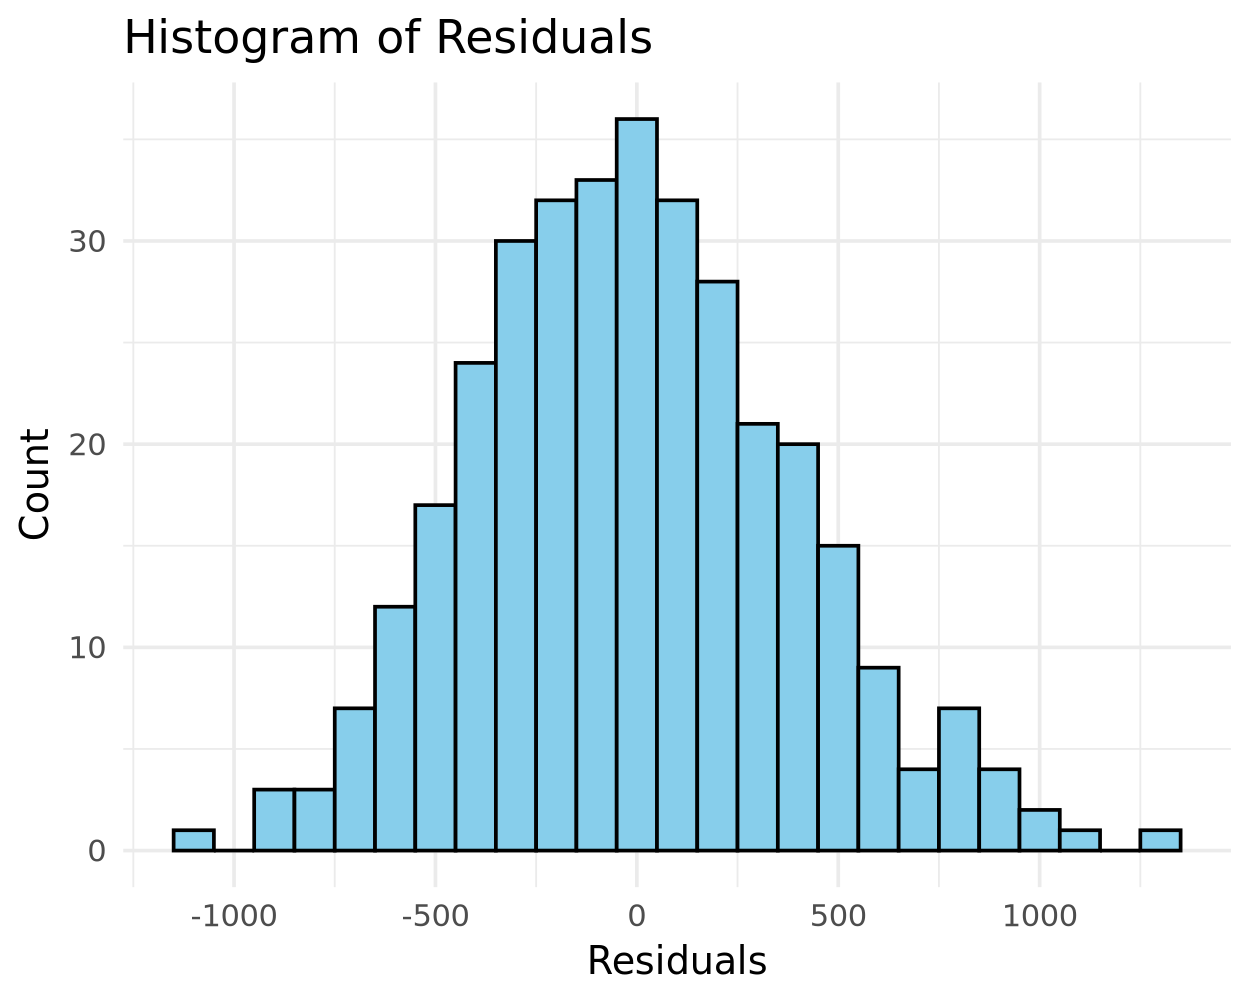

In [10]:
#Add code for the histogram.
ggplot(regression_points, aes(x = .resid)) +
  geom_histogram(binwidth = 100, fill = "skyblue", color = "black") +
  labs(x = "Residuals", y = "Count", title = "Histogram of Residuals") +
  theme_minimal()

**4c)** Does this model meet the normality of residuals condition?

**Answer:**


 - Shape: The histogram shows a roughly symmetric, bell-shaped distribution. 
 - Center: The peak of the histogram is be centered around zero. 
 - Tails: The tails are not much heavier than expected for a normal distribution.
 - Skewness: The distribution does not be heavily skewed to either side


## Equality of variance of the residuals

The final condition says that the residual should exhibit equal variance
across all of the values of the explanatory variable.

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis. Does this model meet the equality of variance of Residuals
condition?

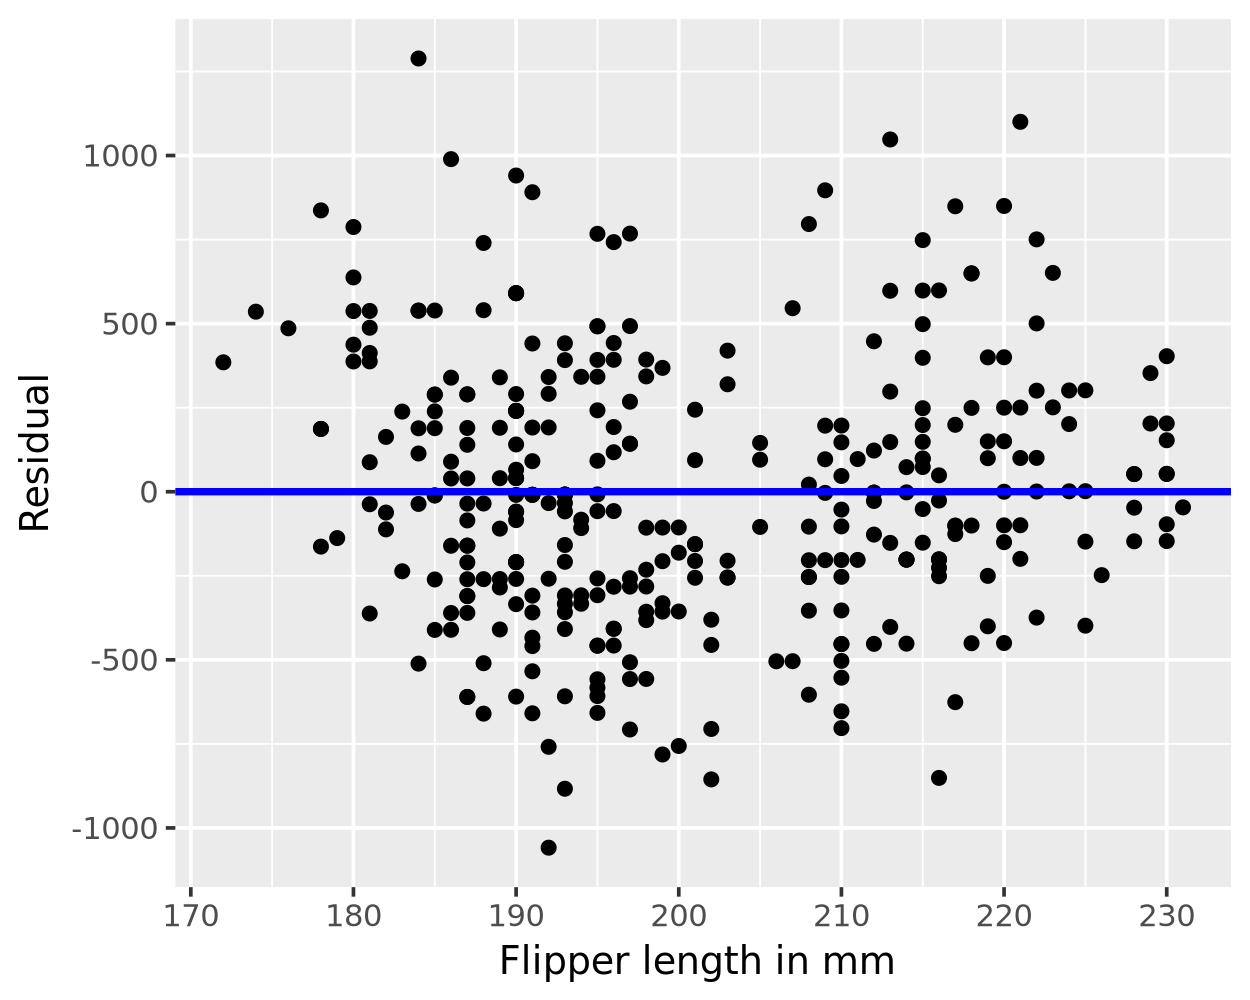

In [11]:
ggplot(regression_points, aes(x = flipper_length_mm, y = .resid)) +
  geom_point() +
  labs(x = "Flipper length in mm ", y = "Residual") +
  geom_hline(yintercept = 0, col = "blue", linewidth = 1)

**4d.** Does this model meet the equality of Residuals condition?

**Answer:**


The residuals appear to be scattered fairly randomly around the horizontal line at y=0, without any obvious patterns or trends. There doesn't seem to be a clear funnel shape or other systematic change in spread as flipper length increases.
Given this, the model appears to reasonably meet the equality of variance (homoscedasticity) condition. However, there might be a slight increase in spread for larger flipper lengths, so it's worth noting this potential minor violation.


## Question 5

Now let’s circle back and take a second look at the confidence
intervals. Using this bootstrap distribution, we’ll construct the 95%
confidence interval using the percentile method and (if appropriate) the
standard error method as well. We can compare our results to the results
from R (which uses mathematical formula to construct confidence
intervals.)

### Step 1: Calculate the bootstrap statistic and Visualize the bootstrap distribution

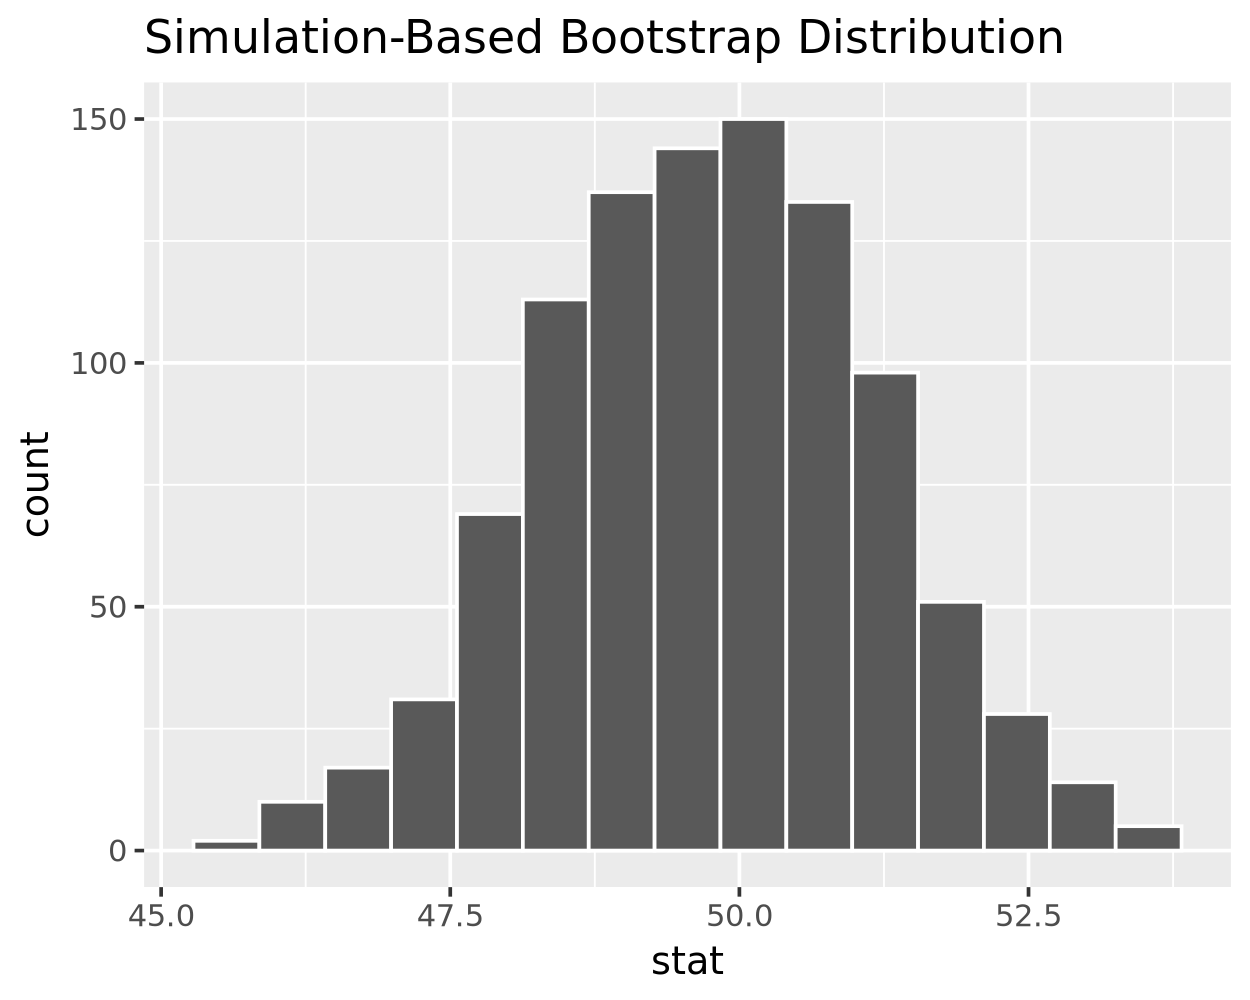

In [12]:
bootstrap_distn_slope = pen |> 
  specify(formula = body_mass_g ~ flipper_length_mm) |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "slope")

visualize(bootstrap_distn_slope)

### Step 2: Calculate CI from the a bootstap resample using the percentile method.

Find a 95% CI using percentile method:

In [13]:
bootstrap_distn_slope |>
    summarize(lower_ci = quantile(stat, 0.025), 
              upper_ci = quantile(stat, 0.975))

lower_ci,upper_ci
<dbl>,<dbl>
46.86436,52.55001


## Question 6

Write down the two 95% confidence intervals for the $\beta_{1}$. a, b,
c, and d with the appropriate values you’ve computed.

When you are done, make sure all the `|` in the table still line up so
your results print out in a table!

| CI construction method                | lower value | upper value |
|---------------------------------------|-------------|-------------|
| Using bootstrap: percentile rule      | 46.84525           | 52.32166           |
| Using mathematical formula (see [above](#Create-a-linear-regression-model)) | 46.70949          | 52.66164           |

In your opinion, would you say these three confidence intervals are
similar?

**Answers:**

In [14]:


yes

ERROR: Error in eval(expr, envir, enclos): object 'yes' not found


## Part 2

For the next part you will check the conditions for regression inference
for a new model. This model will have `bill_length_mm` and `species` as
explanatory variables, and we’ll use the parallel slopes model

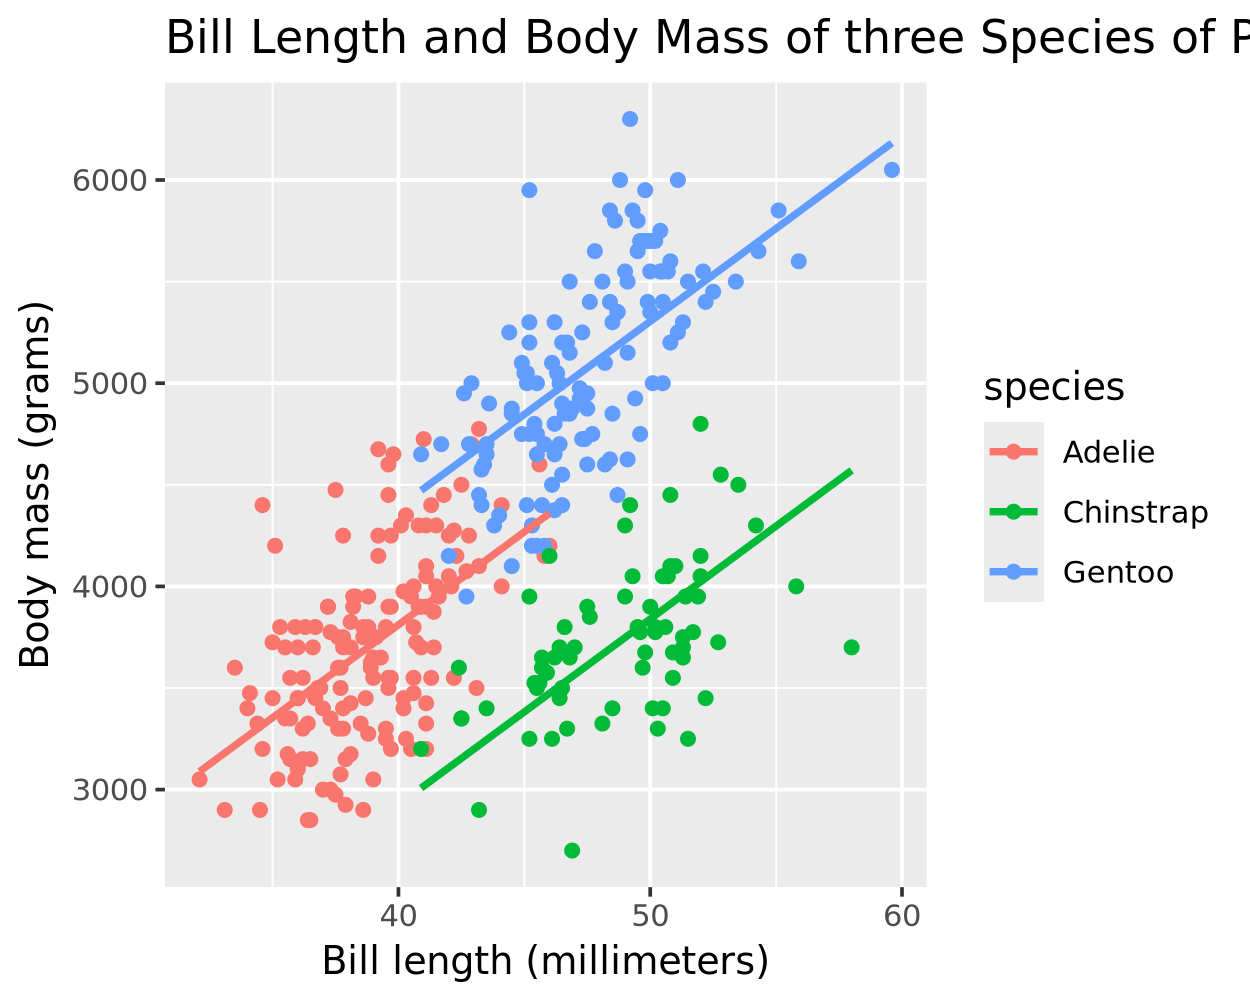

In [15]:
ggplot(data = pen, aes(y = body_mass_g, x = bill_length_mm, color=species)) + 
  geom_point() + 
  geom_parallel_slopes(se = FALSE) +
  labs(x = "Bill length (millimeters)", 
       y = "Body mass (grams)", 
       title = "Bill Length and Body Mass of three Species of Penguins") 

Let’s fit the parallel slopes model

In [16]:
# Fit regression model:

mod = linear_reg() |> set_engine('lm')

pen_parallel = mod |> fit(body_mass_g ~ bill_length_mm + species, data = pen)

# Get regression table:
tidy(pen_parallel)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),153.73969,268.901233,0.5717329,5.678829e-01
bill_length_mm,91.43582,6.887119,13.2763517,1.158990e-32
speciesChinstrap,-885.81208,88.250154,-10.0375131,6.373927e-21
speciesGentoo,578.62916,75.362341,7.6779617,1.756354e-13


Let us once again inspect the conditions necessary for inference with
regression.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Question 7

**Check for Linearity of relationship between variables **

Would you say that the relationship between `bill_length_mm` and
`body_mass_g` appears to be linear for each species?

**Answer:**



The relationship between bill length and body mass appears to be roughly linear for each species. The points for each species generally follow their respective parallel lines without obvious curvature. However, there is some scatter around the lines, particularly for the Gentoo penguins (green), which show more variability.

**Check for Independence of the residuals **

This is the same as the first model that we looked it. The observations
in our data must be independent of one another. In this data, we can not
be sure this is case, for example, some of the penguins included may be
related (siblings, parents). We are not given enough information to
verify this condition has been met.

## Question 8

Check Normality of the residuals (and they should be centered at 0.)

**8a) **

# A tibble: 4 × 5
  term             estimate std.error statistic  p.value
  <chr>               <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         154.     269.       0.572 5.68e- 1
2 bill_length_mm       91.4      6.89    13.3   1.16e-32
3 speciesChinstrap   -886.      88.3    -10.0   6.37e-21
4 speciesGentoo       579.      75.4      7.68  1.76e-13


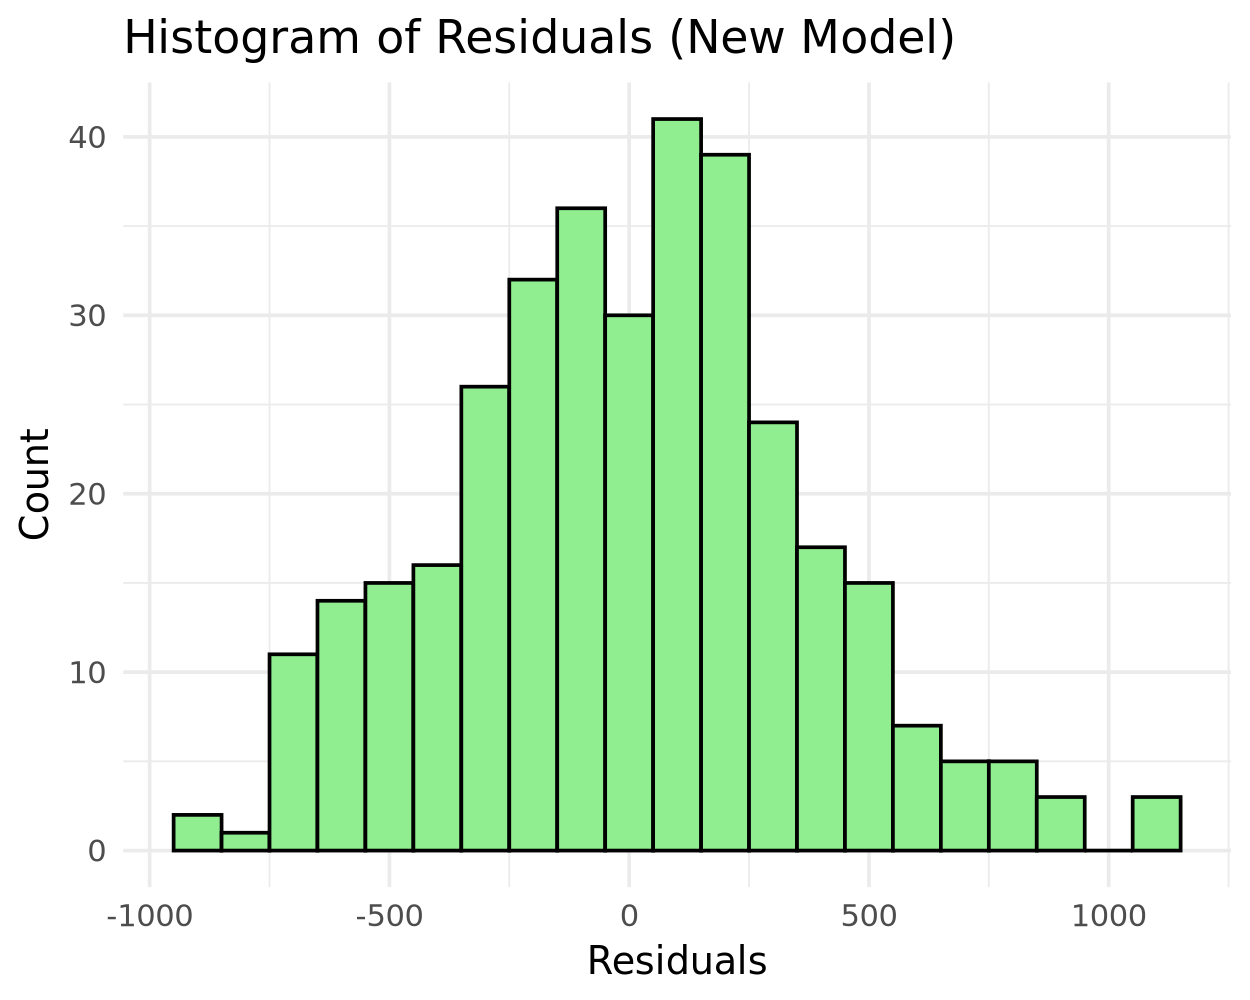

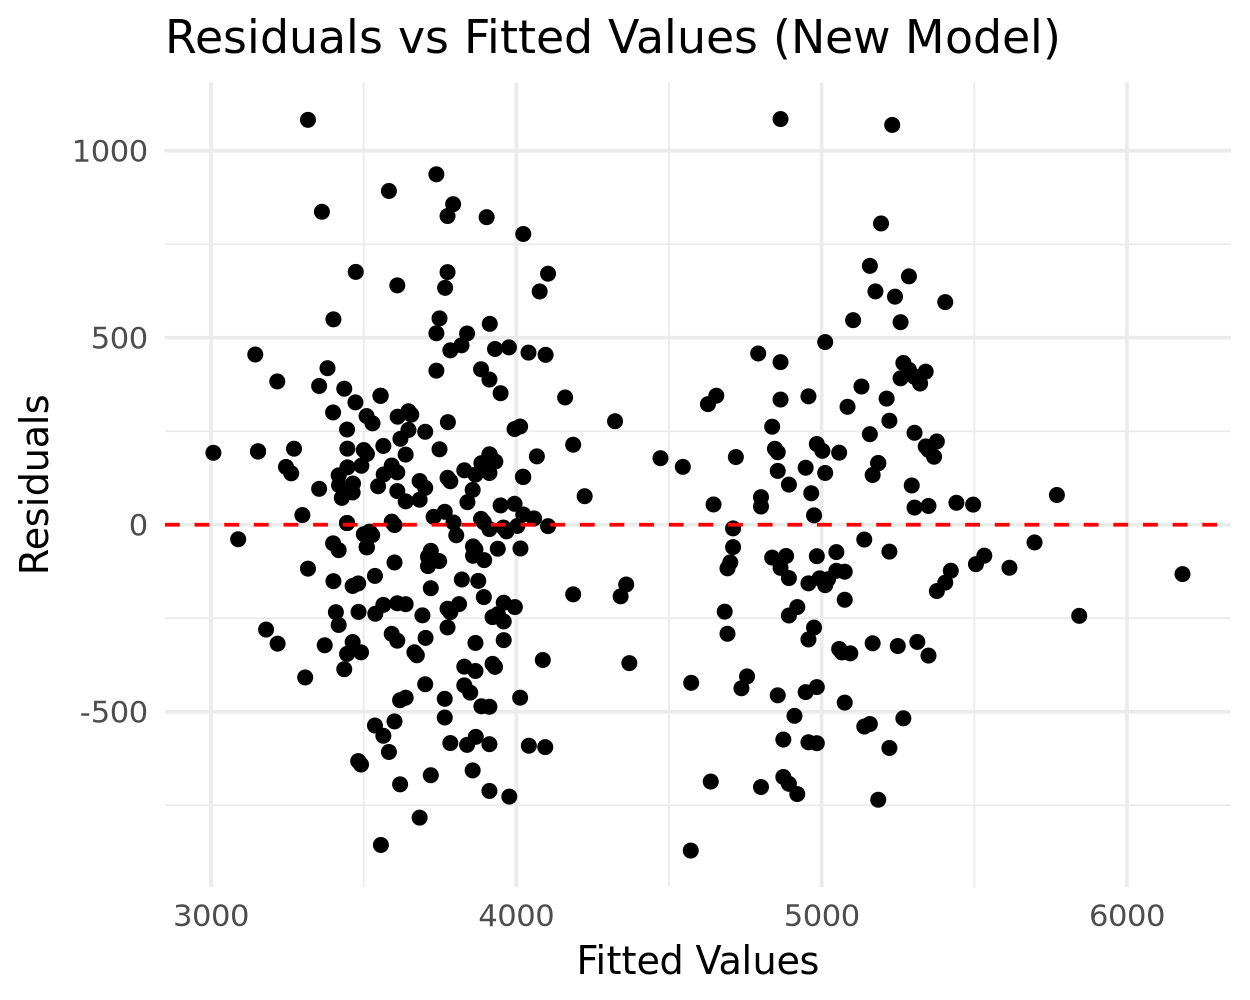

In [18]:
# Load required libraries
library(tidymodels)
library(palmerpenguins)
library(ggplot2)

# Load and prepare data
data(penguins)
pen = penguins |> 
  filter(!is.na(flipper_length_mm))

# Fit the parallel slopes model
mod = linear_reg() |> set_engine('lm')
pen_parallel = mod |> fit(body_mass_g ~ bill_length_mm + species, data = pen)

# Get model summary
model_summary = tidy(pen_parallel)
print(model_summary)

# Create augmented data frame with residuals and fitted values
regression_points_new = augment(pen_parallel$fit)

# Create histogram of residuals
residuals_histogram = ggplot(regression_points_new, aes(x = .resid)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black") +
  labs(x = "Residuals", y = "Count", title = "Histogram of Residuals (New Model)") +
  theme_minimal()

# Create residuals vs fitted values plot
residuals_vs_fitted = ggplot(regression_points_new, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values (New Model)") +
  theme_minimal()

# Display plots
print(residuals_histogram)
print(residuals_vs_fitted)

**8b)** Does this model meet the Normality of Residuals condition?

**Answer:**

YES
Symmetry: The histogram is roughly symmetric around zero.
Bell shape: It resembles a bell-shaped curve.
No extreme outliers: There is not any bars far from the main distribution.



## Question 9

Check for Equality of variance of the residuals

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis.

**9a)**

In [ ]:
#Add code to check this condition:

# Create residuals vs fitted values plot
residuals_vs_fitted = ggplot(regression_points_new, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values (New Model)") +
  theme_minimal()

# Display plots
print(residuals_histogram)
print(residuals_vs_fitted)


**9b) **Does this meet the equality of variance of the residuals
condition?

**Answer:**

YES
There is a relatively even spread of residuals across all fitted values.
No clear patterns or trends in the residuals.
No obvious funneling (i.e., the spread doesn't systematically increase or decrease as the fitted values increase).



## Question 10

Run the code below to find the confidence intervals for our model's coefficients.

In [19]:
boots = bootstraps(pen, times = 1000, apparent = TRUE)

mod = linear_reg() |> set_engine('lm')

boot_models  = boots |> 
  mutate(model = map(splits, ~mod |> fit(body_mass_g ~ bill_length_mm + species, data = as_tibble(.x))),
         coef_info = map(model, tidy))

boot_coefs = boot_models |> 
  unnest(coef_info)

percentile_intervals = int_pctl(boot_models, coef_info)

percentile_intervals

term,.lower,.estimate,.upper,.alpha,.method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-380.89256,157.29633,653.8906,0.05,percentile
bill_length_mm,78.70097,91.35414,105.3537,0.05,percentile
speciesChinstrap,-1045.07978,-887.71328,-744.2407,0.05,percentile
speciesGentoo,433.70483,579.56104,718.0522,0.05,percentile


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


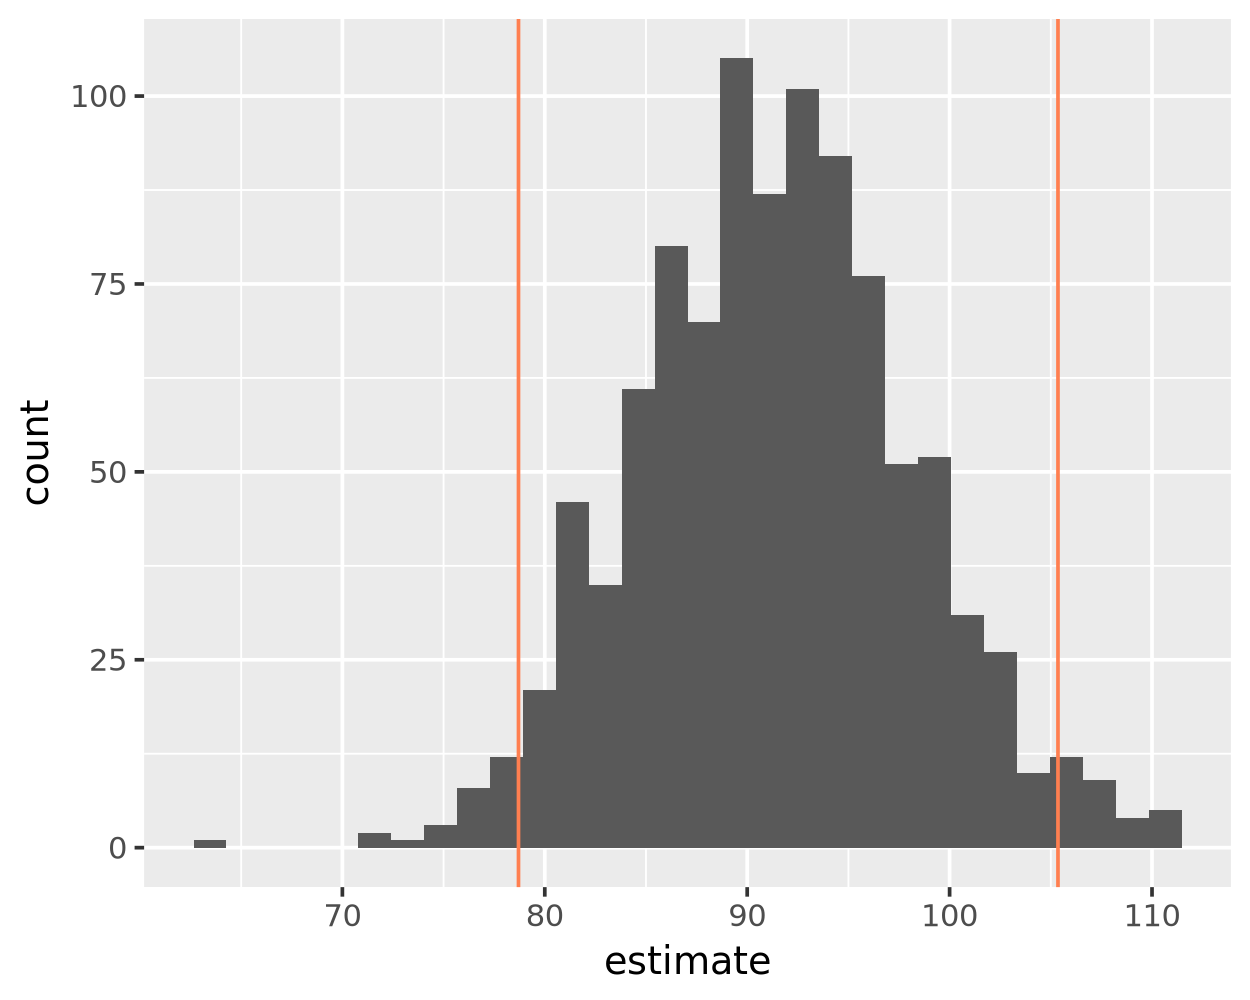

In [20]:
boot_coefs |> 
    filter(term == 'bill_length_mm') |>
ggplot(aes(x = estimate)) +
    geom_histogram() +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.lower), color = 'coral') +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.upper), color = 'coral')

What can we conclude about the relationship between bill length and body
mass?

**Answer:**


1. Direction of the relationship:
The estimate for bill_length_mm is positive (91.35414), indicating a positive relationship between bill length and body mass.
Statistical significance:
The 95% confidence interval for bill_length_mm (78.70097 to 105.35370) does not include zero. This suggests that the relationship between bill length and body mass is statistically significant.
2. Magnitude of the effect:
For every 1 mm increase in bill length, we estimate that body mass increases by about 91.35 grams (95% CI: 78.70 to 105.35 grams), holding the species constant.
Precision of the estimate:
The confidence interval is relatively narrow, suggesting a fairly precise estimate of the relationship.
3. Consistency of the relationship:
The histogram of bootstrap estimates shows a roughly normal distribution centered around the point estimate. This suggests that the relationship is consistent across different samples of the data.
4. Robustness of the finding:
The fact that both the lower and upper bounds of the confidence interval are well above zero (as indicated by the coral lines in the histogram) provides strong evidence for the robustness of this positive relationship.

